### Question: Does the distribution of Internet types follow (70%   20%  10%) for DSL, Cable and Fiber respectively ?

#### Expectations:
 the goal of this question is to provide insights into the distribution of Internet types in a given population or market and to assess whether the expected distribution of 70%, 20%, and 10% for DSL, Cable, and Fiber, respectively, is a reasonable approximation of the actual distribution. This information can be used to inform marketing and product development strategies for specific types of Internet services, and to identify potential areas for improvement in the distribution of Internet types.

#### Note: 
this distribution is not by chance but rather a result of some research that resulted in that DSl internet is the most common as it's affordable then Cable internet then Fiber internet which is the most expensive.

#### Information about the data:
The data is stored in an Excel file named `Telco_customer_churn_service.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The features we are interested in is
`Internet Type`: Type of Internet service (DSL, Fiber optic, None)

### EDA:

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import chisquare


In [2]:
# read the dataset
dataset = pd.read_excel('../Dataset/Telco_customer_churn_services.xlsx')

In [3]:
dataset.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [4]:
# taking only the required column which is Internet Type
dataset = dataset[['Internet Type']]

In [5]:
# checking for null values
dataset.isnull().sum()

Internet Type    0
dtype: int64

In [6]:
dataset.dtypes

Internet Type    object
dtype: object

In [7]:
dataset['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

In [8]:
# drop the rows with 'NOne' values
dataset = dataset[dataset['Internet Type'] != 'None']

In [9]:
dataset['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable'], dtype=object)

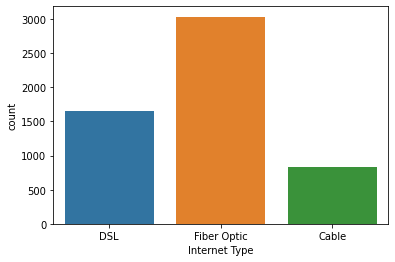

<AxesSubplot:ylabel='Internet Type'>

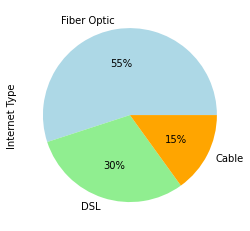

In [16]:
# visualize the distribution of Internet Type
sns.countplot(x='Internet Type', data=dataset)
plt.show()

# visualize the distribution of Internet Type using a pie chart
dataset['Internet Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['lightblue', 'lightgreen', 'orange'])

##### Insights:
The distribution in our data does not follow what we expected but we still need to apply statistical testing to see the significance of it.


In [11]:
# separate the Internet Type into 3 categories
dsl = dataset[dataset['Internet Type'] == 'DSL']
fiber = dataset[dataset['Internet Type'] == 'Fiber Optic']
cable = dataset[dataset['Internet Type'] == 'Cable']

#### Initial Insights:
- The data is clean and has no missing values.
- The data has 3 types of internet services: DSL, Fiber optic.
- Fiber Optic is the most common internet service type in the company.

So the distribution of internet types is not as expected. But we need to do some statistical tests to make sure of that.

### Model Building:

#### Define the Hypothesis:
- H0: The distribution of internet types is as expected which is (70%  20%  10%) for (DSL, Cable, Fiber Optic) respectively.
- H1: The distribution of internet types is not as expected.

#### Statistical Test:
- `Chi-Square Goodness Of Fit` Test will be used
- significance level =[0.1, 0.2, 0.3, 0.4]

In [23]:
# calculate observed frequencies for each Internet Type
observed = np.array([len(dsl), len(cable), len(fiber)])

# calculate the expected frequencies for each Internet Type
expected = np.array([len(dataset) * 0.7, len(dataset) * 0.2, len(dataset) * 0.1])




alpha_list = [0.1, 0.2, 0.3, 0.4]

for alpha in alpha_list:
    # Perform chi-square goodness of fit test
    chi_stat, p_value = chisquare(observed, f_exp=expected)

    # Determine if we reject or accept the null hypothesis
    if p_value < alpha:
        print(f"At alpha {alpha} we reject the null hypothesis, the distribution of internet types does not follow the expected proportions.")
    else:
        print(f"At alpha {alpha} We accept the null hypothesis, the distribution of internet types follows the expected proportions.")


At alpha 0.1 we reject the null hypothesis, the distribution of internet types does not follow the expected proportions.
At alpha 0.2 we reject the null hypothesis, the distribution of internet types does not follow the expected proportions.
At alpha 0.3 we reject the null hypothesis, the distribution of internet types does not follow the expected proportions.
At alpha 0.4 we reject the null hypothesis, the distribution of internet types does not follow the expected proportions.


#### Results:
We managed to reject the null hypothesis and conclude that the Internet Type significantly doesn't follow the distribution of (70% 20% 10%) for (DSL, Cable, Fiber Optic) respectively. Rejecting the null hypothesis means that the observed distribution of internet types is significantly different from the expected distribution of (70% DSL, 20% Cable, 10% Fiber Optic). This indicates that there may be some factors influencing the choice of internet type by customers that are not captured in the expected distribution.

To further investigate this, the company can perform a deeper analysis of customer preferences and behaviors to identify the factors that are driving the distribution of internet types. They can also consider offering promotions or incentives to encourage customers to switch to the internet type that the company wants to promote, based on its business strategy.

Additionally, the company can use the insights gained from this analysis to optimize its product offerings and marketing strategies to better meet the needs and preferences of its customers. For example, they can create tailored marketing campaigns for specific internet types or develop new products that are more appealing to customers who prefer certain types of internet services. 

